In [103]:
include("hmat.jl")
include("geometry.jl")

cluster_from_list (generic function with 1 method)

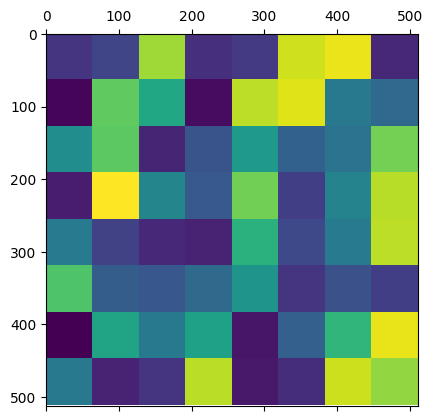

PyObject <matplotlib.image.AxesImage object at 0x1d1209080>

In [101]:
print(c)

640
512 128
256 256 64 64
128 128 128 128
64 64 64 64 64 64 64 64


MersenneTwister(UInt32[0x0000091d], Random.DSFMT.DSFMT_state(Int32[-812920431, 1073547295, -221583675, 1073519389, -625627125, 1073607479, -247095265, 1073060305, -625377656, 1072726491  …  -821818309, 1073144430, -604570845, 1073598451, 1551330179, 79325429, 1210681231, -323629872, 382, 0]), [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], UInt128[0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000  …  0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x000000000000

In [185]:
using Random
Random.seed!(2333)
include("hmat.jl")
include("geometry.jl")
n = 19
N = 64
c = cluster_from_list(ones(Int, n)*N)

A = rand(N*n,N*n)
B, P = construct_hmat(A, c, 60, 10, 1e-3, 100)
# matshow(B)
verify_matrix_error(B, A)
verify_matvec_error(B, A)
verify_lu_error(B)


Matrix Error = 0.0
Matvec Error = 5.025870553437178e-16
Solve Error = 2.405038958713987e-10
LU Matrix Error = 2.282884992155232e-11


1216×1216 Array{Float64,2}:
 0.0           0.0           0.0          …   0.0           0.0        
 0.0           0.0           0.0              0.0           0.0        
 1.38778e-17  -5.55112e-17   0.0              0.0           0.0        
 1.11022e-16   1.38778e-17   0.0              0.0           0.0        
 0.0           0.0           1.11022e-16      0.0           0.0        
 5.55112e-17  -5.55112e-17   0.0          …   0.0           0.0        
 0.0           0.0           0.0             -1.11022e-16   5.55112e-17
 0.0          -1.11022e-16   0.0              4.44089e-16  -5.55112e-17
 2.77556e-17  -1.11022e-16   0.0              0.0           0.0        
 5.55112e-17   0.0           0.0             -2.22045e-16   0.0        
 1.11022e-16   0.0           0.0          …  -2.22045e-16   1.11022e-16
 2.77556e-17   0.0           0.0              0.0           0.0        
 0.0          -1.11022e-16   1.11022e-16      0.0           0.0        
 ⋮                                  

In [220]:
function generate_hmat()
    N = 3070
    cs = uniform_cluster(N, 57)
    c = cluster_from_list(cs)
    A = zeros(N, N)
    for i = 1:size(A,1)
        for j = 1:size(A,1)
            if i==j
                A[i,j] = 10
            else
                A[i,j] = -1/(abs(j-i))
            end
        end
    end
    Nleaf = 64
    eps = 1e-5
    Rrank = 10
    MaxBlock = div(size(A,1),2)
    
    H,_ = construct_hmat(A, c, Nleaf, Rrank, eps, MaxBlock)
    verify_matvec_error(H, A)
    verify_matrix_error(H,A)
    verify_lu_error(H)
    
    return A, H
end

generate_hmat (generic function with 1 method)

In [221]:
include("hmat.jl")
generate_hmat()

Matvec Error = 1.1442597727446368e-7
Matrix Error = 1.531020173420797e-7
Solve Error = 1.0046103717731529e-7
LU Matrix Error = 4.25743361343045e-7


([10.0 -1.0 … -0.000325945 -0.000325839; -1.0 10.0 … -0.000326052 -0.000325945; … ; -0.000325945 -0.000326052 … 10.0 -1.0; -0.000325839 -0.000325945 … -1.0 10.0], Hmat
  A: Array{Float64}((0, 0)) Array{Float64}(0,0)
  B: Array{Float64}((0, 0)) Array{Float64}(0,0)
  C: Array{Float64}((0, 0)) Array{Float64}(0,0)
  P: Array{Int64}((0,)) Int64[]
  is_rkmatrix: Bool false
  is_fullmatrix: Bool false
  is_hmat: Bool true
  m: Int64 3070
  n: Int64 3070
  children: Array{Hmat}((2, 2))
  s: Cluster
  t: Cluster
)

In [ ]:
N = 1000
cs = uniform_cluster(N, 64)
c = cluster_from_list(cs)
print(c)

In [83]:
print(c)

512
256 256
128 128 128 128
64 64 64 64 64 64 64 64


In [82]:
G = to_fmat(B)
println(size(G))

(512, 512)


In [64]:
print(B)

=============== size = 14x14 ===================
+0.3405 +0.4760 +0.5359 +0.5561 +0.8699 +0.6511 +0.4012 +0.8961 +0.8248 +0.3543 +0.9579 +0.3560 +0.4700 +0.5558 
+0.4946 +0.1119 +0.0633 +0.9680 +0.3402 +0.5872 +0.1484 +0.9718 +0.3847 +0.1015 +0.5386 +0.5412 +0.2757 +0.8676 
+0.5435 +0.7342 +0.6899 +0.1310 +0.9889 +0.0332 +0.1224 +0.2125 +0.9109 +0.6142 +0.6139 +0.4246 +0.3904 +0.3065 
+0.7389 +0.2655 +0.8642 +0.0116 +0.0996 +0.8173 +0.0671 +0.6741 +0.4900 +0.7173 +0.4385 +0.3680 +0.9072 +0.4906 
+0.4944 +0.9227 +0.9747 +0.5768 +0.1665 +0.2024 +0.6567 +0.4120 +0.4314 +0.7679 +0.9751 +0.7338 +0.8142 +0.3786 
+0.8520 +0.3021 +0.9987 +0.4377 +0.2563 +0.9167 +0.2114 +0.7023 +0.7673 +0.6560 +0.1728 +0.1521 +0.4000 +0.5352 
+0.2441 +0.1261 +0.7491 +0.4961 +0.3454 +0.1324 +0.6373 +0.5043 +0.9223 +0.9680 +0.3029 +0.6996 +0.2125 +0.9883 
+0.9543 +0.4911 +0.6962 +0.8896 +0.1989 +0.4006 +0.5319 +0.1872 +0.8286 +0.7616 +0.8383 +0.0201 +0.0213 +0.9346 
+0.6226 +0.0868 +0.8116 +0.1997 +0.9038 +0.4777

Solve Error = 3.2471100673667827e-15
LU Matrix Error = 6.661338147750939e-16


14×14 Array{Float64,2}:
  0.0           0.0           0.0          …   0.0           0.0        
  0.0           0.0           0.0              0.0           0.0        
 -5.55112e-17   0.0           0.0              0.0           1.11022e-16
  0.0          -5.55112e-17   0.0              0.0           0.0        
 -5.55112e-17   0.0           0.0              1.11022e-16   0.0        
 -2.77556e-17   0.0           0.0          …   0.0           0.0        
  0.0           0.0           0.0              0.0           0.0        
 -1.11022e-16   0.0           1.11022e-16      2.22045e-16   0.0        
  0.0           1.38778e-17   0.0              0.0           0.0        
  0.0           0.0          -2.77556e-17      4.44089e-16  -2.22045e-16
 -5.55112e-17   0.0           0.0          …   2.22045e-16   2.22045e-16
  0.0           0.0          -5.55112e-17     -1.38778e-16   5.55112e-17
 -2.77556e-17   0.0           0.0              0.0          -2.22045e-16
  0.0           0.0        

In [109]:
c = Cluster(m = 3, n = 4, N = 7, s = 1, e = 7)
c1 = Cluster(N = 3, isleaf=true, s = 1, e = 3)
c2 = Cluster(N = 4, isleaf=true, s = 4, e = 7)
c.left = c1
c.right = c2

Cluster
  X: Array{Float64}((0,)) Float64[]
  P: Array{Int64}((0,)) Int64[]
  left: Nothing nothing
  right: Nothing nothing
  m: Int64 0
  n: Int64 0
  N: Int64 4
  isleaf: Bool true
  s: Int64 4
  e: Int64 7


In [110]:
print(c)

7
3 4


In [111]:
H11 = fullmat([6. 2. 2.;2. 4. 2.;2. 2. 2.], c1, c1)
H12 = rkmat(2. * ones(3,1),3. * ones(4,1),c1, c2)
H21 = rkmat(ones(4,1),ones(3,1),c2, c1)
H22 = fullmat([3. 1. 1. 1;1. 2. 1. 1.;1. 1. 1. 1.; 1. 1. 1. 0.], c2, c2)
H = hmat_from_children(H11, H12, H21, H22, c, c)

Hmat
  A: Array{Float64}((0, 0)) Array{Float64}(0,0)
  B: Array{Float64}((0, 0)) Array{Float64}(0,0)
  C: Array{Float64}((0, 0)) Array{Float64}(0,0)
  P: Array{Int64}((0,)) Int64[]
  is_rkmatrix: Bool false
  is_fullmatrix: Bool false
  is_hmat: Bool true
  m: Int64 7
  n: Int64 7
  children: Array{Hmat}((2, 2))
  s: Cluster
  t: Cluster


In [112]:
consistency(H)

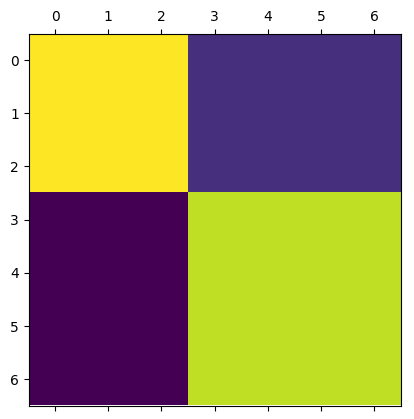

PyObject <matplotlib.image.AxesImage object at 0x1d1983dd8>

In [113]:
matshow(H)

In [114]:
G = [+6.0000 +2.0000 +2.0000 
+2.0000 +4.0000 +2.0000
+2.0000 +2.0000 +2.0000]
lu!(G)
G

3×3 Array{Float64,2}:
 6.0       2.0      2.0    
 0.333333  3.33333  1.33333
 0.333333  0.4      0.8    

In [115]:
[1. 0. 0.
1/3 1. 0.
1/3 0.4 1.]\(6*ones(3,4))

3×4 Array{Float64,2}:
 6.0  6.0  6.0  6.0
 4.0  4.0  4.0  4.0
 2.4  2.4  2.4  2.4

In [116]:
ones(4,3)/UpperTriangular(G)

4×3 Array{Float64,2}:
 0.166667  0.2  0.5
 0.166667  0.2  0.5
 0.166667  0.2  0.5
 0.166667  0.2  0.5

In [117]:
include("hmat.jl")
H11 = fullmat([6. 2. 2.;2. 4. 2.;2. 2. 2.], c1, c1)
H12 = rkmat(2. * ones(3,1),3. * ones(4,1),c1, c2)
H21 = rkmat(ones(4,1),ones(3,1),c2, c1)
H22 = fullmat([3. 1. 1. 1;1. 2. 1. 1.;1. 1. 1. 1.; 1. 1. 1. 0.], c2, c2)
H = hmat_from_children(H11, H12, H21, H22, c, c)
lu!(H)

7-element Array{Int64,1}:
 1
 2
 3
 5
 4
 6
 7

In [118]:
H11 = fullmat(rand(3,3), c1, c1)
H12 = rkmat(rand(3,1),rand(4,1),c1, c2)
H21 = rkmat(rand(4,1),rand(3,1),c2, c1)
H22 = fullmat(rand(4,4), c2, c2)
H = hmat_from_children(H11, H12, H21, H22, c, c)
verify_lu_error(H)
verify_matrix_error(H, to_fmat(H))
verify_matvec_error(H, to_fmat(H))
lu!(H)


Solve Error = 2.219682625368574e-15
LU Matrix Error = 1.1102230246251565e-16
Matrix Error = 0.0
Matvec Error = 6.1842304230019e-17


7-element Array{Int64,1}:
 3
 1
 2
 7
 5
 4
 6

In [ ]:
+6.0000 +2.0000 +2.0000 +6.0000 +6.0000 +6.0000 +6.0000 
+0.3333 +3.3333 +1.3333 +4.0000 +4.0000 +4.0000 +4.0000 
+0.3333 +0.4000 +0.8000 +2.4000 +2.4000 +2.4000 +2.4000 
+0.1667 +0.2000 +0.5000 -2.0000 -1.0000 -2.0000 -2.0000 
+0.1667 +0.2000 +0.5000 -0.0000 -2.0000 -2.0000 -2.0000 
+0.1667 +0.2000 +0.5000 +1.0000 +0.5000 +1.0000 +1.0000 
+0.1667 +0.2000 +0.5000 +1.0000 +0.5000 +1.0000 -1.0000

In [21]:
F = lu!(K)
printmat(K)

=============== size = 4x4 ===================
-2.0002 -1.0002 -2.0002 -2.0002 
-0.0000 -2.0001 -2.0001 -2.0001 
-0.5000 +0.0000 +0.0001 -1.9999 
-0.5000 +0.0000 +0.3333 +0.6667 


In [22]:
F.p

4-element Array{Int64,1}:
 1
 2
 4
 3